
## 1."스마트워치" 시간에 따른 트랜드변화


In [ ]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import os

In [8]:
#검색 키워드, 검색기간 입력

keyword = "스마트워치"
period =  "today 5-y" # 검색기간 : 최근 5년, 6년이상부터 구글에서 블락함 ㅠㅠ

In [9]:
# 구글 트랜드 접속
trend_obj = TrendReq()
trend_obj.build_payload(kw_list=[keyword], timeframe = period) 
# 사용된 메쏘드 역할  검색단어와 검색기간 전달 

In [10]:
# 시간에 따른 Trend 변화
trend_df = trend_obj.interest_over_time() # 사용된 메쏘드 역할: 시간에 따른 트랜드 분석 로드
print(trend_df.head())

            스마트워치  isPartial
date                        
2017-08-20     24      False
2017-08-27     30      False
2017-09-03     29      False
2017-09-10     15      False
2017-09-17     19      False


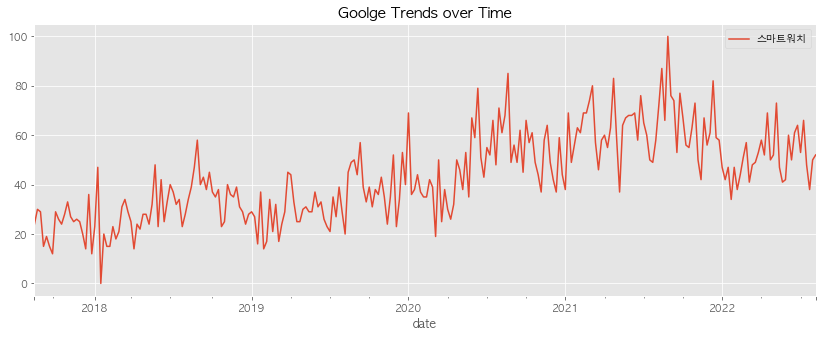

In [13]:
# 그래프 출력 및 사진저장

from matplotlib import rc
rc('font', family='AppleGothic')
plt.style.use("ggplot")
plt.figure(figsize=(14,5))
trend_df["스마트워치"].plot()
plt.title("Goolge Trends over Time", size=15)
plt.legend(labels=["스마트워치"], loc="upper right")
plt.savefig("Trends over time", dpi=300)

## 1-2 결론
 1.스마트워치 검색량은 꾸준히 늘어났다. 


## 2.검색어 트랜드 비교 
* 애플 -- 애플워치
* 삼성 -- 갤럭시 워치. 액티브
* 순토
* 샤오미

In [16]:
# 검색 keyword, 검색기간 입력

keyword1= "애플워치"
keyword2= "갤럭시 워치"
keyword3= "순토"
keyword4= "샤오미"
period = "today 5-y"  # 검색기간 : 최근 5년 

In [17]:
# Goolge Trend 접속 및 데이터 탑재
trend_obj = TrendReq()
trend_obj.build_payload(kw_list=[keyword1, keyword2, keyword3, keyword4], timeframe=period) #kw_list :최대 5개
trend_df = trend_obj.interest_over_time()
print(trend_df)

            애플워치  갤럭시 워치  순토  샤오미  isPartial
date                                        
2017-08-20     5       1   1   26      False
2017-08-27     4       1   1   26      False
2017-09-03     1       1   1   28      False
2017-09-10    10       0   0   29      False
2017-09-17     7       0   1   28      False
...          ...     ...  ..  ...        ...
2022-07-10    46      33   2   24      False
2022-07-17    47      24   1   24      False
2022-07-24    49      26   1   22      False
2022-07-31    47      28   1   23      False
2022-08-07    52      48   1   23       True

[260 rows x 5 columns]


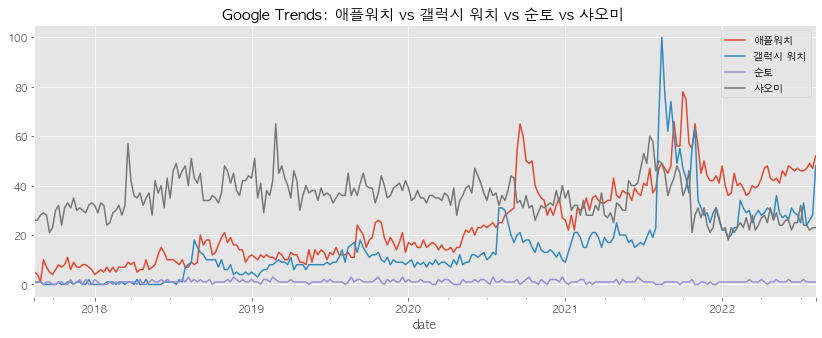

In [20]:
# 그래프 출력
plt.style.use("ggplot")
plt.figure(figsize=(14,5))
trend_df[keyword1].plot()
trend_df[keyword2].plot()
trend_df[keyword3].plot()
trend_df[keyword4].plot()
plt.title("Google Trends: %s vs %s vs %s vs %s " %(keyword1, keyword2, keyword3, keyword4), size=15)
plt.legend(loc="best")
plt.savefig("애플워치 vs 갤럭시 워치 vs 순토 vs 샤오미", dpi=300)

# 2-2결론
 1.애플,갤럭시, 샤오미 삼파전이 치뤄지고 있다.
 
 2.순토의 검색량은 거의 미미한 수준이다. 

## 3 '스마트워치' 관련 추천검색어 


In [21]:
# 검색 keyword에 대한 추천 검색어 확인
keyword  = "스마트워치"
suggested_keywords= trend_obj.suggestions(keyword) 
print(suggested_keywords)
print("\n")



[{'mid': '/m/0280wht', 'title': 'Smartwatch', 'type': 'Topic'}, {'mid': '/g/11kdmhhpxd', 'title': 'Apple Watch SE', 'type': 'Topic'}, {'mid': '/g/11m1vz_cgj', 'title': 'Apple Watch Nike SE', 'type': 'Topic'}, {'mid': '/m/0hznqdh', 'title': 'Sony SmartWatch', 'type': 'Watch'}, {'mid': '/g/11rghqrq4g', 'title': 'Realme S', 'type': 'Topic'}]




In [22]:
import pandas as pd
sk_df=pd.DataFrame(suggested_keywords)
sk_df

,mid,title,type
0,/m/0280wht,Smartwatch,Topic
1,/g/11kdmhhpxd,Apple Watch SE,Topic
2,/g/11m1vz_cgj,Apple Watch Nike SE,Topic
3,/m/0hznqdh,Sony SmartWatch,Watch
4,/g/11rghqrq4g,Realme S,Topic


In [40]:
new_keyword = suggested_keywords[0]['title']
print(new_keyword)
print("\n")

Smartwatch




In [41]:
#검색을 위한 탑재
perid = "today 5-y" # 검색기간: 최근 5년
trend_obj.build_payload(kw_list=[new_keyword], timeframe=perid)

In [42]:
#상위 30개 지역 선택_1
trend_df= trend_obj.interest_by_region()
print(trend_df.head())

                   Smartwatch
geoName                      
Busan                      69
Chungcheongbuk-do          78
Chungcheongnam-do          64
Daegu                      63
Daejeon                    97


In [29]:
#상위 30개 지역 선택_2
trend_top30= trend_df.sort_values(by=new_keyword, ascending=False).head(30)
print(trend_top30)
print("\n")

                      Smartwatch
geoName                         
Poland                       100
Romania                       82
Portugal                      78
Netherlands                   74
Greece                        70
Germany                       64
Brazil                        59
Chile                         50
Spain                         49
Mexico                        48
Italy                         47
Belgium                       41
Denmark                       41
Austria                       39
Costa Rica                    39
Guatemala                     36
Paraguay                      35
Croatia                       34
Colombia                      32
Sweden                        31
India                         30
Ecuador                       30
United Arab Emirates          27
Argentina                     26
Switzerland                   25
Ireland                       24
United Kingdom                23
Peru                          23
Indonesia 

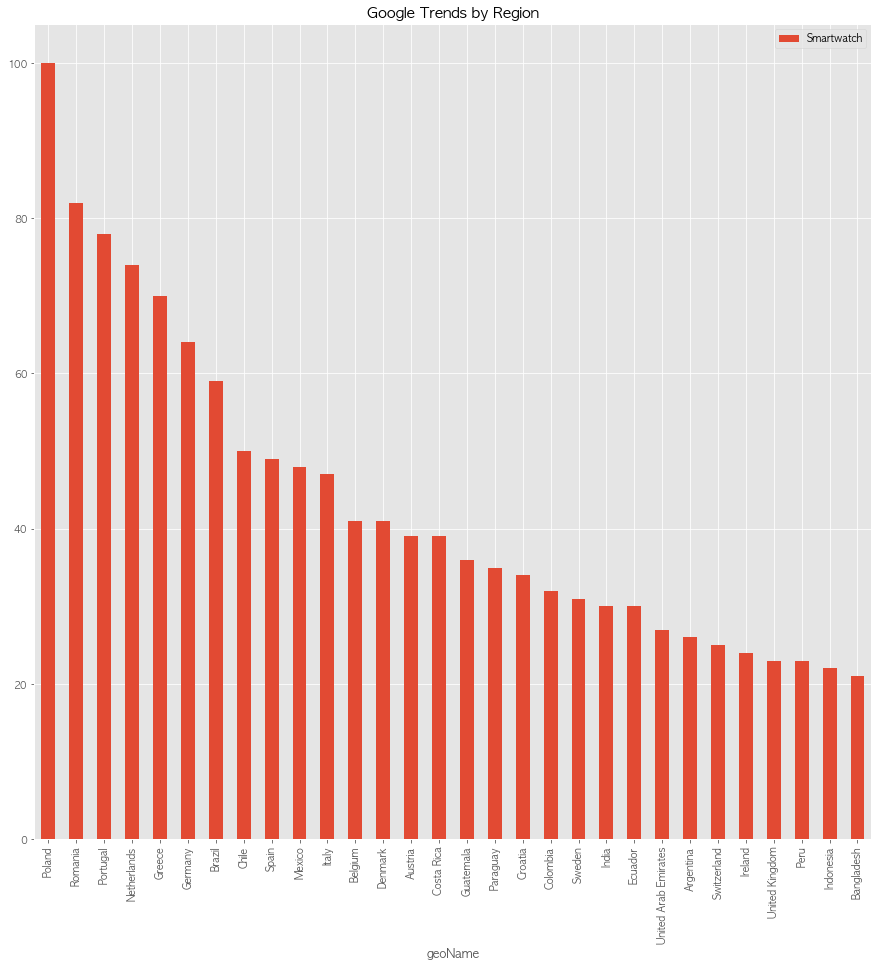

In [43]:
# 그래프 출력 및 저장 
plt.style.use("ggplot")
plt.figure(figsize=(15,15))
trend_top30[new_keyword].plot(kind='bar')
plt.title("Google Trends by Region", size=15)
plt.legend(labels=[new_keyword], loc="upper right")
plt.legend(loc="best")
plt.savefig("Smartwatch_Trends_by_Region", dpi=300)

## 3-3 결론
 그 무엇도 내릴수 없다. 애초에 처음 한국어 '스마트워치'를 검색해서 나온 영어 번역인 'smartwatch' 가 나왔다. 
 
 이것은 신뢰할수 없다. 나라마다 워딩이 다를수 있기 떄문이다. 예) wellness-tracker 

## 4.로컬 트랜드 분석_한국




In [32]:
# 검색 keyword, 검색 지역, 검색 기간 입력
keyword1= "애플워치"
keyword2= "갤럭시 워치"
keyword3= "순토"
keyword4= "샤오미"
local_area = "KR"
period = "today 5-y"



In [34]:
# Goolge Trend 접속 및 데이터 탑재 
trend_obj=TrendReq()
trend_obj.build_payload(kw_list=[keyword1, keyword2, keyword3, keyword4], timeframe = period, geo=local_area)
trend_df = trend_obj.interest_over_time()

In [ ]:
# 그래프 출력 및 저장
plt.style.use('ggplot')
plt.figure(figsize=(14,5))
trend_df[keyword1].plot()
trend_df[keyword2].plot()
plt.title("Google Trends: %s vs. %s" % (keyword1, keyword2), size=15)
plt.legend(loc='best')
plt.savefig("진라면_신라면.png", dpi=300)

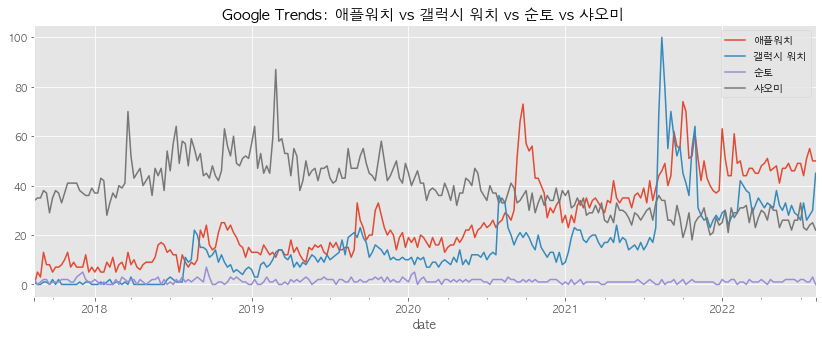

In [35]:
# 그래프 출력
plt.style.use("ggplot")
plt.figure(figsize=(14,5))
trend_df[keyword1].plot()
trend_df[keyword2].plot()
trend_df[keyword3].plot()
trend_df[keyword4].plot()
plt.title("Google Trends: %s vs %s vs %s vs %s " %(keyword1, keyword2, keyword3, keyword4), size=15)
plt.legend(loc="best")
plt.savefig("국내 애플워치 vs 갤럭시 워치 vs 순토 vs 샤오미", dpi=300)

## 결론
글로벌 영역과 국내 영역에서 검색어 패턴이 유사하게 나온다.  
 이결과가 국외에 있는 한국어사용가능자에 의한 검색인지
 한글을 구글에서 번역해 smartwatch에 해당하는 검색어 결과를 가져온건지 정확히 모르겠다. 
 -> 번역ㅎ